## PROBLEM STATEMENT

#### Given the bank customer data predict whether the customer will subscribe a term deposit (Yes/No). This is a classification problem and we will use Logistic Regression to predict whether customer will subscribe for term deposit or not¶


### Importing Dataset

In [20]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 

In [21]:
bank = pd.read_csv("bank-full.csv",sep=';')

In [22]:
bank.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [23]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [24]:
bank.shape

(45211, 17)

In [25]:
bank.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

### Observations :-
If we compare the 75% values and max values for the columns like Balance, Duration, Campaign, Pdays and Previous we can see there is a huge difference. So there are chances of outliers in our data. We will check this further using Data visualization techniques.

### Understanding the target variable

#### We need to predict whether the customer will subscribe for the term deposit or not. So, the target variable here is y (outcome) and is of Yes/No form

In [26]:
bank["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

### We can see that we have more number of no values (the customers have not subscribed for term deposits) than yes values in our data. This means that we have class imbalance problem in our data

## Data visualization

<AxesSubplot:>

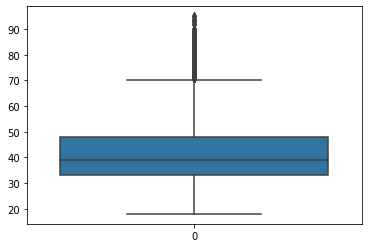

In [27]:
sns.boxplot(data=[bank["age"]])

### Observations :-
We can see that the Age values lies from 20 to 70 (Approx.)
Most of the age values are between 30 to 50 (25 percentile to 75 percentile)
There are few outlier values more than 70. As mostly the average lifetime of human being is around 70 years

<AxesSubplot:>

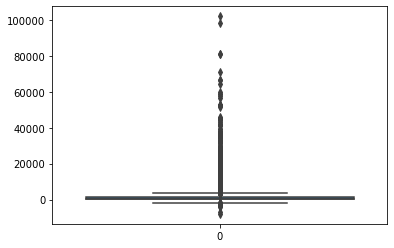

In [28]:
sns.boxplot(data=[bank["balance"]])

#### Observations :-
The boxplot of balance is very different than usual boxplots. We can see lot of outliers data. This is mainly due to the reason that each person maintains a very different balance.
We can see most of the people are maintaining a very low balance.
There are few people(only 5-6) who are maintaining a balance of more than 60,000

<AxesSubplot:>

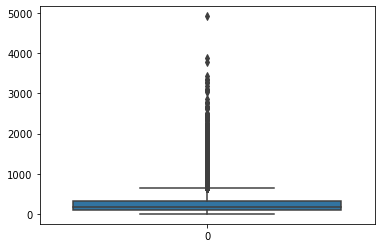

In [29]:
sns.boxplot(data=[bank["duration"]])

### Observations :-
We can see that there are outliers value in our duration values.
Most of the points lie between -1 and 1000.

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='campaign'>

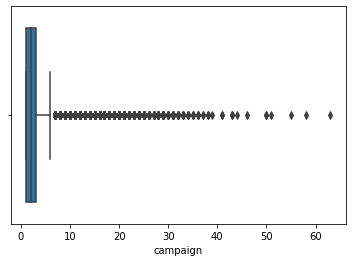

In [30]:
sn.boxplot(bank['campaign'])

### Observations :-
The most of the values are less than 10 for campaign.
There are few outliers which means lot of contacts were made for these clients

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pdays'>

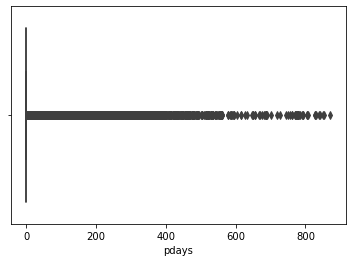

In [31]:
sn.boxplot(bank['pdays'])

### Observations :-
The boxplot shows most of the data points have the value of -1 which means that most of the clients were contacted the first time
There are some clients that were contacted many times and few more than 800 times as well.

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='previous'>

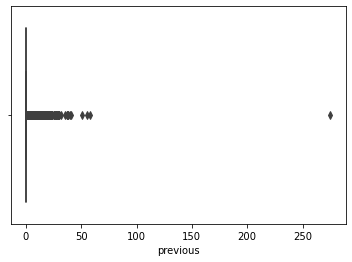

In [32]:
sn.boxplot(bank['previous'])

Observations :-
The boxplot of Previous is very similar to pdays but the outlier values here are less.
We can see most of the values as 0 so which means the clients were not contacted before this campaign.
There is one client which was contacted more than 250 times before the campaign. There is a vast difference between this value and other values as all the other values are less than 100. There is a chance that this might be a typo (human error).### 

## Distplot

### Dist plots are used to check the distribution of the data, peak value(the observation having the highest frequecy) and check for skewness in the data

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

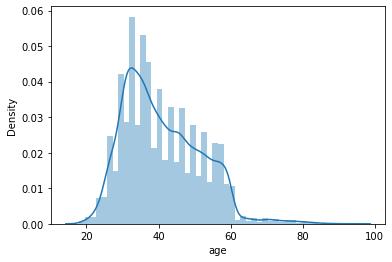

In [35]:
sns.distplot(bank['age'])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='balance', ylabel='Density'>

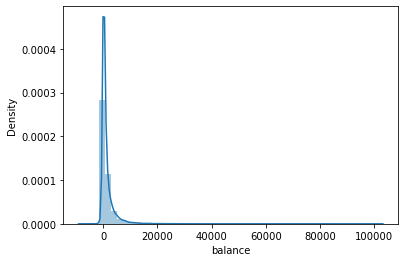

In [36]:
sns.distplot(bank['balance'])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

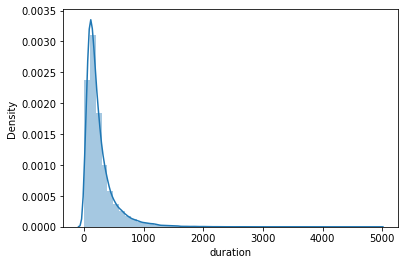

In [37]:
sns.distplot(bank['duration'])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='campaign', ylabel='Density'>

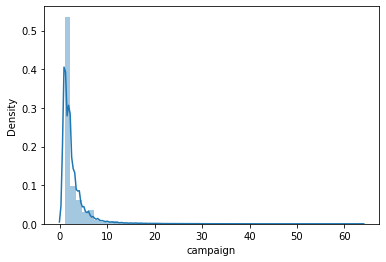

In [38]:
sn.distplot(bank['campaign'])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pdays', ylabel='Density'>

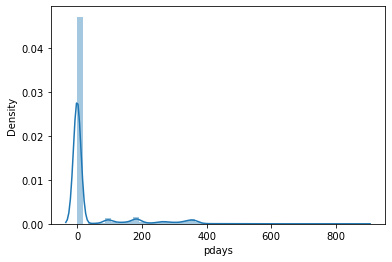

In [39]:
sns.distplot(bank['pdays'])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='previous', ylabel='Density'>

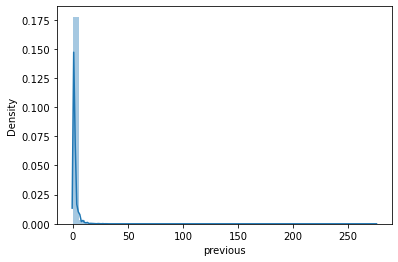

In [40]:
sns.distplot(bank['previous'])

### Observations

#### We can see high positive skewness in all the above dist plots¶

### Heatmap
Heatmap is a very effective technique to check the missing values in the dataset and to also understand if there is any correlation between the features of the data

<AxesSubplot:>

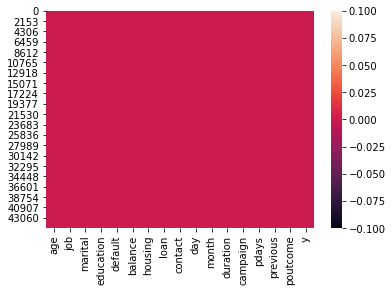

In [41]:
sns.heatmap(bank.isnull())

### Observations 
We don't have any missing values in our dataset. If it was present, there would be a different colour shade appearing on the red background.
We can check missing values by using isna() method as well.

In [42]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## Correlation

#### The Correlation matrix is an important data analysis metric that is computed to summarize data to understand the relationship (correlation) between various variables and make decisions accordingly

### Correlation only works on the continuous variables and we have few categorical variables in our dataset. We need to convert them into numerical values using Encoding techniques. 

#### We have few categorical variables in our data job, marital,education, default, housing, loan, contact, month, poutcome and the output variable y as well. 

In [43]:
bank["job"].describe()

count           45211
unique             12
top       blue-collar
freq             9732
Name: job, dtype: object

#### We have total 12 unique values in job column. So we will go for Label Encoding Technique as the number of total unique values are 12 and if we use One hot Encoding technique we will have 12 more columns

In [45]:
level_encoder = preprocessing.LabelEncoder()
bank["job"] = level_encoder.fit_transform(bank["job"])
bank["job"].unique()

array([ 4,  9,  2,  1, 11,  5,  0,  7,  6, 10,  3,  8], dtype=int64)

In [46]:
bank['marital'].describe()

count       45211
unique          3
top       married
freq        27214
Name: marital, dtype: object

In [48]:
bank.head()

age  job  marital  education default  balance housing loan  contact  day  \
0   58    4  married   tertiary      no     2143     yes   no  unknown    5   
1   44    9   single  secondary      no       29     yes   no  unknown    5   
2   33    2  married  secondary      no        2     yes  yes  unknown    5   
3   47    1  married    unknown      no     1506     yes   no  unknown    5   
4   33   11   single    unknown      no        1      no   no  unknown    5   

  month  duration  campaign  pdays  previous poutcome   y  
0   may       261         1     -1         0  unknown  no  
1   may       151         1     -1         0  unknown  no  
2   may        76         1     -1         0  unknown  no  
3   may        92         1     -1         0  unknown  no  
4   may       198         1     -1         0  unknown  no

#### We can see that marital column is having 3 unique values and we can use both One Hot Encoding and Label Encoding Techniques here. The marital values are not ordinal so we can go for One Hot Encoding Technique.

In [49]:
bank = pd.get_dummies(bank, columns=['marital'])
bank.head()

age  job  education default  balance housing loan  contact  day month  \
0   58    4   tertiary      no     2143     yes   no  unknown    5   may   
1   44    9  secondary      no       29     yes   no  unknown    5   may   
2   33    2  secondary      no        2     yes  yes  unknown    5   may   
3   47    1    unknown      no     1506     yes   no  unknown    5   may   
4   33   11    unknown      no        1      no   no  unknown    5   may   

   duration  campaign  pdays  previous poutcome   y  marital_divorced  \
0       261         1     -1         0  unknown  no                 0   
1       151         1     -1         0  unknown  no                 0   
2        76         1     -1         0  unknown  no                 0   
3        92         1     -1         0  unknown  no                 0   
4       198         1     -1         0  unknown  no                 0   

   marital_married  marital_single  
0                1               0  
1                0               1  
2                1               0  
3                1               0  
4                0               1

In [50]:
bank['education'].describe()

count         45211
unique            4
top       secondary
freq          23202
Name: education, dtype: object

### We can see that education column is having 3 unique values and we can use both One Hot Encoding and Label Encoding Techniques here. The values are ordinal (primary, secondary, etc.) so we can go for Label Encoding Technique. If we use One Hot Encoding technique for ordinal data then there is a chance that we can have multicollinearity problem (as the outcome of one variable can easily be predicted with the help of the remaining variables)

In [51]:
label_encoder = preprocessing.LabelEncoder()

In [52]:
bank["education"] = label_encoder.fit_transform(bank["education"])

In [53]:
bank.head()

age  job  education default  balance housing loan  contact  day month  \
0   58    4          2      no     2143     yes   no  unknown    5   may   
1   44    9          1      no       29     yes   no  unknown    5   may   
2   33    2          1      no        2     yes  yes  unknown    5   may   
3   47    1          3      no     1506     yes   no  unknown    5   may   
4   33   11          3      no        1      no   no  unknown    5   may   

   duration  campaign  pdays  previous poutcome   y  marital_divorced  \
0       261         1     -1         0  unknown  no                 0   
1       151         1     -1         0  unknown  no                 0   
2        76         1     -1         0  unknown  no                 0   
3        92         1     -1         0  unknown  no                 0   
4       198         1     -1         0  unknown  no                 0   

   marital_married  marital_single  
0                1               0  
1                0               1  
2                1               0  
3                1               0  
4                0               1

In [54]:
bank['default'].describe()

count     45211
unique        2
top          no
freq      44396
Name: default, dtype: object

#### We can see that default column is having only 2 unique values and we can use both One Hot Encoding and Label Encoding Techniques here. The values in default column are not ordinal so we can go for One Hot Encoding Technique.

In [55]:
bank = pd.get_dummies(bank, columns=['default'])
bank.head()

age  job  education  balance housing loan  contact  day month  duration  \
0   58    4          2     2143     yes   no  unknown    5   may       261   
1   44    9          1       29     yes   no  unknown    5   may       151   
2   33    2          1        2     yes  yes  unknown    5   may        76   
3   47    1          3     1506     yes   no  unknown    5   may        92   
4   33   11          3        1      no   no  unknown    5   may       198   

   campaign  pdays  previous poutcome   y  marital_divorced  marital_married  \
0         1     -1         0  unknown  no                 0                1   
1         1     -1         0  unknown  no                 0                0   
2         1     -1         0  unknown  no                 0                1   
3         1     -1         0  unknown  no                 0                1   
4         1     -1         0  unknown  no                 0                0   

   marital_single  default_no  default_yes  
0               0           1            0  
1               1           1            0  
2               0           1            0  
3               0           1            0  
4               1           1            0

In [56]:
bank['housing'].describe()

count     45211
unique        2
top         yes
freq      25130
Name: housing, dtype: object

### We can see that housing column is having only 2 unique values and we can use both One Hot Encoding and Label Encoding Techniques here. The values in housing column are not ordinal, so we can go for One Hot Encoding Technique.

In [57]:
bank = pd.get_dummies(bank, columns=['housing'])
bank.head()

age  job  education  balance loan  contact  day month  duration  campaign  \
0   58    4          2     2143   no  unknown    5   may       261         1   
1   44    9          1       29   no  unknown    5   may       151         1   
2   33    2          1        2  yes  unknown    5   may        76         1   
3   47    1          3     1506   no  unknown    5   may        92         1   
4   33   11          3        1   no  unknown    5   may       198         1   

   ...  previous  poutcome   y marital_divorced  marital_married  \
0  ...         0   unknown  no                0                1   
1  ...         0   unknown  no                0                0   
2  ...         0   unknown  no                0                1   
3  ...         0   unknown  no                0                1   
4  ...         0   unknown  no                0                0   

   marital_single  default_no  default_yes  housing_no  housing_yes  
0               0           1            0           0            1  
1               1           1            0           0            1  
2               0           1            0           0            1  
3               0           1            0           0            1  
4               1           1            0           1            0  

[5 rows x 21 columns]

### For loan column as we we have only 2 unique values(yes/no). So similar like housing we can use One Hot Encoding Tecnhique

In [58]:
bank = pd.get_dummies(bank, columns=['loan'])
bank.head()

age  job  education  balance  contact  day month  duration  campaign  \
0   58    4          2     2143  unknown    5   may       261         1   
1   44    9          1       29  unknown    5   may       151         1   
2   33    2          1        2  unknown    5   may        76         1   
3   47    1          3     1506  unknown    5   may        92         1   
4   33   11          3        1  unknown    5   may       198         1   

   pdays  ...   y marital_divorced marital_married  marital_single  \
0     -1  ...  no                0               1               0   
1     -1  ...  no                0               0               1   
2     -1  ...  no                0               1               0   
3     -1  ...  no                0               1               0   
4     -1  ...  no                0               0               1   

   default_no  default_yes  housing_no  housing_yes  loan_no  loan_yes  
0           1            0           0            1        1         0  
1           1            0           0            1        1         0  
2           1            0           0            1        0         1  
3           1            0           0            1        1         0  
4           1            0           1            0        1         0  

[5 rows x 22 columns]

In [59]:
bank['contact'].describe()

count        45211
unique           3
top       cellular
freq         29285
Name: contact, dtype: object

### We can see that contact column is having only 3 unique values and we can use both One Hot Encoding and Label Encoding Techniques here. The values in contact column are not ordinal, so we can go for One Hot Encoding Technique.


In [60]:
bank = pd.get_dummies(bank, columns=['contact'])
bank.head()

age  job  education  balance  day month  duration  campaign  pdays  \
0   58    4          2     2143    5   may       261         1     -1   
1   44    9          1       29    5   may       151         1     -1   
2   33    2          1        2    5   may        76         1     -1   
3   47    1          3     1506    5   may        92         1     -1   
4   33   11          3        1    5   may       198         1     -1   

   previous  ... marital_single default_no  default_yes  housing_no  \
0         0  ...              0          1            0           0   
1         0  ...              1          1            0           0   
2         0  ...              0          1            0           0   
3         0  ...              0          1            0           0   
4         0  ...              1          1            0           1   

   housing_yes  loan_no  loan_yes  contact_cellular  contact_telephone  \
0            1        1         0                 0                  0   
1            1        1         0                 0                  0   
2            1        0         1                 0                  0   
3            1        1         0                 0                  0   
4            0        1         0                 0                  0   

   contact_unknown  
0                1  
1                1  
2                1  
3                1  
4                1  

[5 rows x 24 columns]

In [61]:
bank['month'].describe()

count     45211
unique       12
top         may
freq      13766
Name: month, dtype: object

### We have 12 unique values in the month column. So we will use Label Encoding technique. Also the months of a year are ordinal

In [62]:
bank['month']= label_encoder.fit_transform(bank['month']) 
  
bank['month'].unique() 

array([ 8,  6,  5,  1, 10,  9,  2,  4,  3,  7,  0, 11])

In [63]:
bank['poutcome'].describe()

count       45211
unique          4
top       unknown
freq        36959
Name: poutcome, dtype: object

#### We can see that poutcome column is having only 4 unique values and we can use both One Hot Encoding and Label Encoding Techniques here. The values in pouttcome column are not ordinal, so we can go for One Hot Encoding Technique.

In [64]:
bank = pd.get_dummies(bank, columns=['poutcome'])
bank.head()

age  job  education  balance  day  month  duration  campaign  pdays  \
0   58    4          2     2143    5      8       261         1     -1   
1   44    9          1       29    5      8       151         1     -1   
2   33    2          1        2    5      8        76         1     -1   
3   47    1          3     1506    5      8        92         1     -1   
4   33   11          3        1    5      8       198         1     -1   

   previous  ... housing_yes  loan_no  loan_yes  contact_cellular  \
0         0  ...           1        1         0                 0   
1         0  ...           1        1         0                 0   
2         0  ...           1        0         1                 0   
3         0  ...           1        1         0                 0   
4         0  ...           0        1         0                 0   

   contact_telephone  contact_unknown  poutcome_failure  poutcome_other  \
0                  0                1                 0               0   
1                  0                1                 0               0   
2                  0                1                 0               0   
3                  0                1                 0               0   
4                  0                1                 0               0   

   poutcome_success  poutcome_unknown  
0                 0                 1  
1                 0                 1  
2                 0                 1  
3                 0                 1  
4                 0                 1  

[5 rows x 27 columns]

In [65]:
bank['y'].describe()

count     45211
unique        2
top          no
freq      39922
Name: y, dtype: object

 ### We can see that y column is having only 2 unique values (yes/no) type. The y column is actually our outcome value. We need to predict the y values for our data ie whether a client will subscribe for term deposit or not¶
The frequency count of no value is 39922 out of total 45211 values in our data. We can say our data is imbalaced.

In [66]:
bank['y']= label_encoder.fit_transform(bank['y']) 
  
bank['y'].unique() 

array([0, 1])

In [67]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [68]:
bank.head()

age  job  education  balance  day  month  duration  campaign  pdays  \
0   58    4          2     2143    5      8       261         1     -1   
1   44    9          1       29    5      8       151         1     -1   
2   33    2          1        2    5      8        76         1     -1   
3   47    1          3     1506    5      8        92         1     -1   
4   33   11          3        1    5      8       198         1     -1   

   previous  y  marital_divorced  marital_married  marital_single  default_no  \
0         0  0                 0                1               0           1   
1         0  0                 0                0               1           1   
2         0  0                 0                1               0           1   
3         0  0                 0                1               0           1   
4         0  0                 0                0               1           1   

   default_yes  housing_no  housing_yes  loan_no  loan_yes  contact_cellular  \
0            0           0            1        1         0                 0   
1            0           0            1        1         0                 0   
2            0           0            1        0         1                 0   
3            0           0            1        1         0                 0   
4            0           1            0        1         0                 0   

   contact_telephone  contact_unknown  poutcome_failure  poutcome_other  \
0                  0                1                 0               0   
1                  0                1                 0               0   
2                  0                1                 0               0   
3                  0                1                 0               0   
4                  0                1                 0               0   

   poutcome_success  poutcome_unknown  
0                 0                 1  
1                 0                 1  
2                 0                 1  
3                 0                 1  
4                 0                 1

<AxesSubplot:>

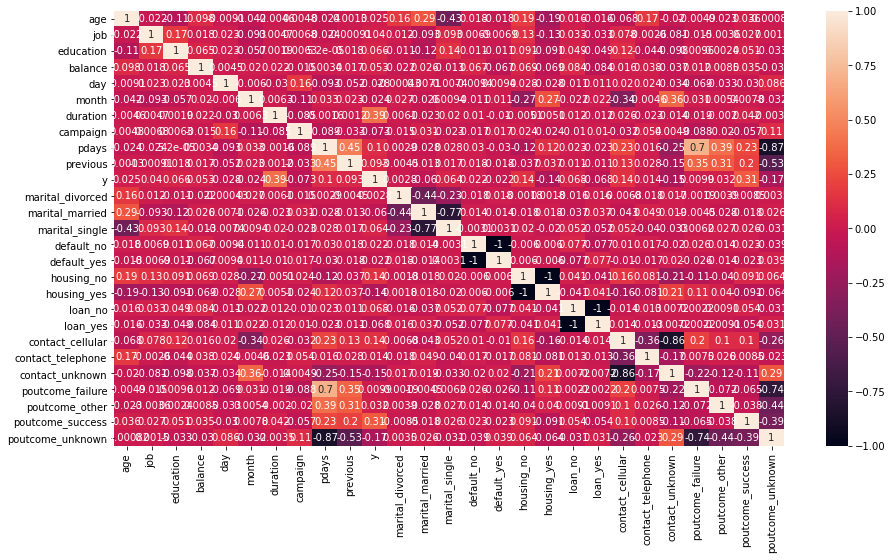

In [69]:
plt.figure(figsize=(15,8))
sns.heatmap(bank.corr(),annot=True)

In [70]:
bank.corr()

age       job  education   balance       day  \
age                1.000000 -0.021868  -0.106807  0.097783 -0.009120   
job               -0.021868  1.000000   0.166707  0.018232  0.022856   
education         -0.106807  0.166707   1.000000  0.064514  0.022671   
balance            0.097783  0.018232   0.064514  1.000000  0.004503   
day               -0.009120  0.022856   0.022671  0.004503  1.000000   
month             -0.042357 -0.092870  -0.057304  0.019777 -0.006028   
duration          -0.004648  0.004744   0.001935  0.021560 -0.030206   
campaign           0.004760  0.006839   0.006255 -0.014578  0.162490   
pdays             -0.023758 -0.024455   0.000052  0.003435 -0.093044   
previous           0.001288 -0.000911   0.017570  0.016674 -0.051710   
y                  0.025155  0.040438   0.066241  0.052838 -0.028348   
marital_divorced   0.164674  0.012383  -0.010523 -0.021732 -0.000433   
marital_married    0.286257 -0.093245  -0.121185  0.025708  0.007102   
marital_single    -0.427817  0.092562   0.139162 -0.012537 -0.007412   
default_no         0.017879  0.006853   0.010718  0.066745 -0.009424   
default_yes       -0.017879 -0.006853  -0.010718 -0.066745  0.009424   
housing_no         0.185513  0.125363   0.090790  0.068768  0.027982   
housing_yes       -0.185513 -0.125363  -0.090790 -0.068768 -0.027982   
loan_no            0.015655  0.033004   0.048574  0.084350 -0.011370   
loan_yes          -0.015655 -0.033004  -0.048574 -0.084350  0.011370   
contact_cellular  -0.068375  0.077792   0.115600  0.015880  0.020186   
contact_telephone  0.170349 -0.002573  -0.044168  0.037999  0.023652   
contact_unknown   -0.020132 -0.080668  -0.098023 -0.037331 -0.034103   
poutcome_failure  -0.004927 -0.015417   0.009625  0.011857 -0.068700   
poutcome_other    -0.022967 -0.003597   0.002446  0.008466 -0.032952   
poutcome_success   0.035526  0.027324   0.051218  0.035240 -0.030321   
poutcome_unknown  -0.000816  0.001535  -0.032830 -0.030271  0.086256   

                      month  duration  campaign     pdays  previous         y  \
age               -0.042357 -0.004648  0.004760 -0.023758  0.001288  0.025155   
job               -0.092870  0.004744  0.006839 -0.024455 -0.000911  0.040438   
education         -0.057304  0.001935  0.006255  0.000052  0.017570  0.066241   
balance            0.019777  0.021560 -0.014578  0.003435  0.016674  0.052838   
day               -0.006028 -0.030206  0.162490 -0.093044 -0.051710 -0.028348   
month              1.000000  0.006314 -0.110031  0.033065  0.022727 -0.024471   
duration           0.006314  1.000000 -0.084570 -0.001565  0.001203  0.394521   
campaign          -0.110031 -0.084570  1.000000 -0.088628 -0.032855 -0.073172   
pdays              0.033065 -0.001565 -0.088628  1.000000  0.454820  0.103621   
previous           0.022727  0.001203 -0.032855  0.454820  1.000000  0.093236   
y                 -0.024471  0.394521 -0.073172  0.103621  0.093236  1.000000   
marital_divorced   0.026538  0.006100 -0.015484  0.002897 -0.004534  0.002772   
marital_married   -0.025927 -0.022683  0.031371 -0.027600 -0.012691 -0.060260   
marital_single     0.009369  0.020328 -0.023120  0.027943  0.017006  0.063526   
default_no        -0.011486  0.010021 -0.016822  0.029979  0.018329  0.022419   
default_yes        0.011486 -0.010021  0.016822 -0.029979 -0.018329 -0.022419   
housing_no        -0.271481 -0.005075  0.023599 -0.124178 -0.037076  0.139173   
housing_yes        0.271481  0.005075 -0.023599  0.124178  0.037076 -0.139173   
loan_no           -0.022145  0.012412 -0.009980  0.022754  0.011043  0.068185   
loan_yes           0.022145 -0.012412  0.009980 -0.022754 -0.011043 -0.068185   
contact_cellular  -0.338259  0.025543 -0.032271  0.225996  0.131717  0.135873   
contact_telephone -0.004616 -0.023201  0.053895  0.016006  0.028097  0.014042   
contact_unknown    0.359322 -0.014379  0.004853 -0.247068 -0.154162 -0.150935   
poutcome_failure   0.031249 -0.018925 -0.088131  0.701052  0.35

In [71]:
Y = bank['y']

In [73]:
X = bank.drop('y',axis=1)

### Fitting a Logistic Regression Model

In [74]:
classifier = LogisticRegression(class_weight="balanced")
classifier.fit(X,Y)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

####  We will try to predict Y values for the X values in our data. Using class_weight as balanced, to assign weights as we have imbalanced data with us

In [76]:
y_pred = classifier.predict(X)

In [82]:
y_pred_df = pd.DataFrame({"actual":Y,
                          "predicted_prob":classifier.predict(X)})

In [83]:
y_pred_df

actual  predicted_prob
0           0               0
1           0               0
2           0               0
3           0               0
4           0               1
5           0               0
6           0               0
7           0               1
8           0               0
9           0               0
10          0               0
11          0               0
12          0               1
13          0               0
14          0               0
15          0               0
16          0               0
17          0               0
18          0               0
19          0               0
20          0               0
21          0               0
22          0               0
23          0               1
24          0               0
25          0               0
26          0               0
27          0               0
28          0               0
29          0               1
30          0               0
31          0               0
32          0               0
33          0               0
34          0               1
35          0               0
36          0               0
37          0               1
38          0               1
39          0               0
40          0               0
41          0               0
42          0               0
43          0               1
44          0               1
45          0               0
46          0               0
47          0               0
48          0               0
49          0               1
50          0               0
51          0               0
52          0               0
53          0               1
54          0               0
55          0               0
56          0               0
57          0               0
58          0               0
59          0               1
60          0               0
61          0               1
62          0               0
63          0               1
64          0               0
65          0               0
66          0               1
67          0               0
68          0               0
69          0               0
70          0               0
71          0               0
72          0               0
73          0               0
74          0               0
75          0               0
76          0               0
77          0               1
78          0               0
79          0               0
80          0               0
81          0               0
82          0               0
83          1               1
84          0               0
85          0               1
86          1               1
87          1               1
88          0               0
89          0               0
90          0               0
91          0               0
92          0               1
93          0               0
94          0               0
95          0               1
96          0               0
97          0               0
98          0               0
99          0               0
100         0               0
101         0               0
102         0               0
103         0               0
104         0               1
105         0               0
106         0               0
107         0               0
108         0               1
109         0               1
110         0               0
111         0               0
112         0               0
113         0               0
114         0               0
115         0               0
116         0               1
117         0               1
118         0               0
119         0               0
120         0               1
121         0               0
122         0               0
123         0               0
124         0               0
125         0               0
126         0               0
127         0               0
128         0               0
129         1               1
130         0               1
131         0               0
132         0    

## Checking model accuracy¶
 ## We have multiple ways of checking model accuracy for our classification model.We will use below 2 methods

Confusion matrix report
ROC curve

## Confusion Matrix for the model accuracy¶

In [84]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[31132  8790]
 [ 1245  4044]]


In [86]:
((39020+1684)/(39020+902+3605+1684))*100

90.0311871004844

 ### Classification report

In [87]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86     39922
           1       0.32      0.76      0.45      5289

    accuracy                           0.78     45211
   macro avg       0.64      0.77      0.65     45211
weighted avg       0.89      0.78      0.81     45211



## ROC Curve

Text(0, 0.5, 'True Positive Rate')

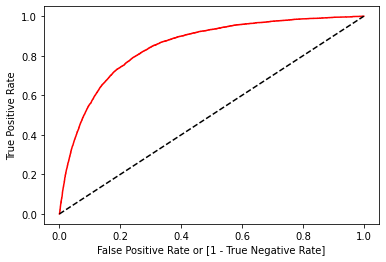

In [88]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [89]:
auc

0.7722132179303811